In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_csv("diabetes_data_upload.csv")
df["Age"] = df["Age"] > np.average(df["Age"])
columns = df.columns[:-1]
df_gd = pd.get_dummies(df, columns=columns)

In [5]:
x = df_gd.drop("class", axis=1)
y = df_gd["class"]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=5)

In [7]:
dtree = DecisionTreeClassifier(criterion="entropy", random_state=5)
dtree.fit(x_train, y_train)
score = dtree.score(x_test, y_test)

In [8]:
scores = cross_val_score(dtree, x, y, scoring="accuracy", cv=10)

In [9]:
print("scores: ", scores)
print("avg score: ", sum(scores) / len(scores))

scores:  [0.88461538 0.94230769 0.90384615 0.98076923 0.90384615 0.98076923
 0.98076923 1.         1.         1.        ]
avg score:  0.9576923076923076


In [10]:
predictions = dtree.predict(x_test)

In [11]:
print(accuracy_score(y_test, predictions))
# f1_score contains both recall and precision in its own equation.
print(f1_score(y_test, predictions, average="macro"))
print(precision_score(y_test, predictions, average="macro"))
print(recall_score(y_test, predictions, average="macro"))

0.9307692307692308
0.9281105990783409
0.9294871794871795
0.9268561627052193


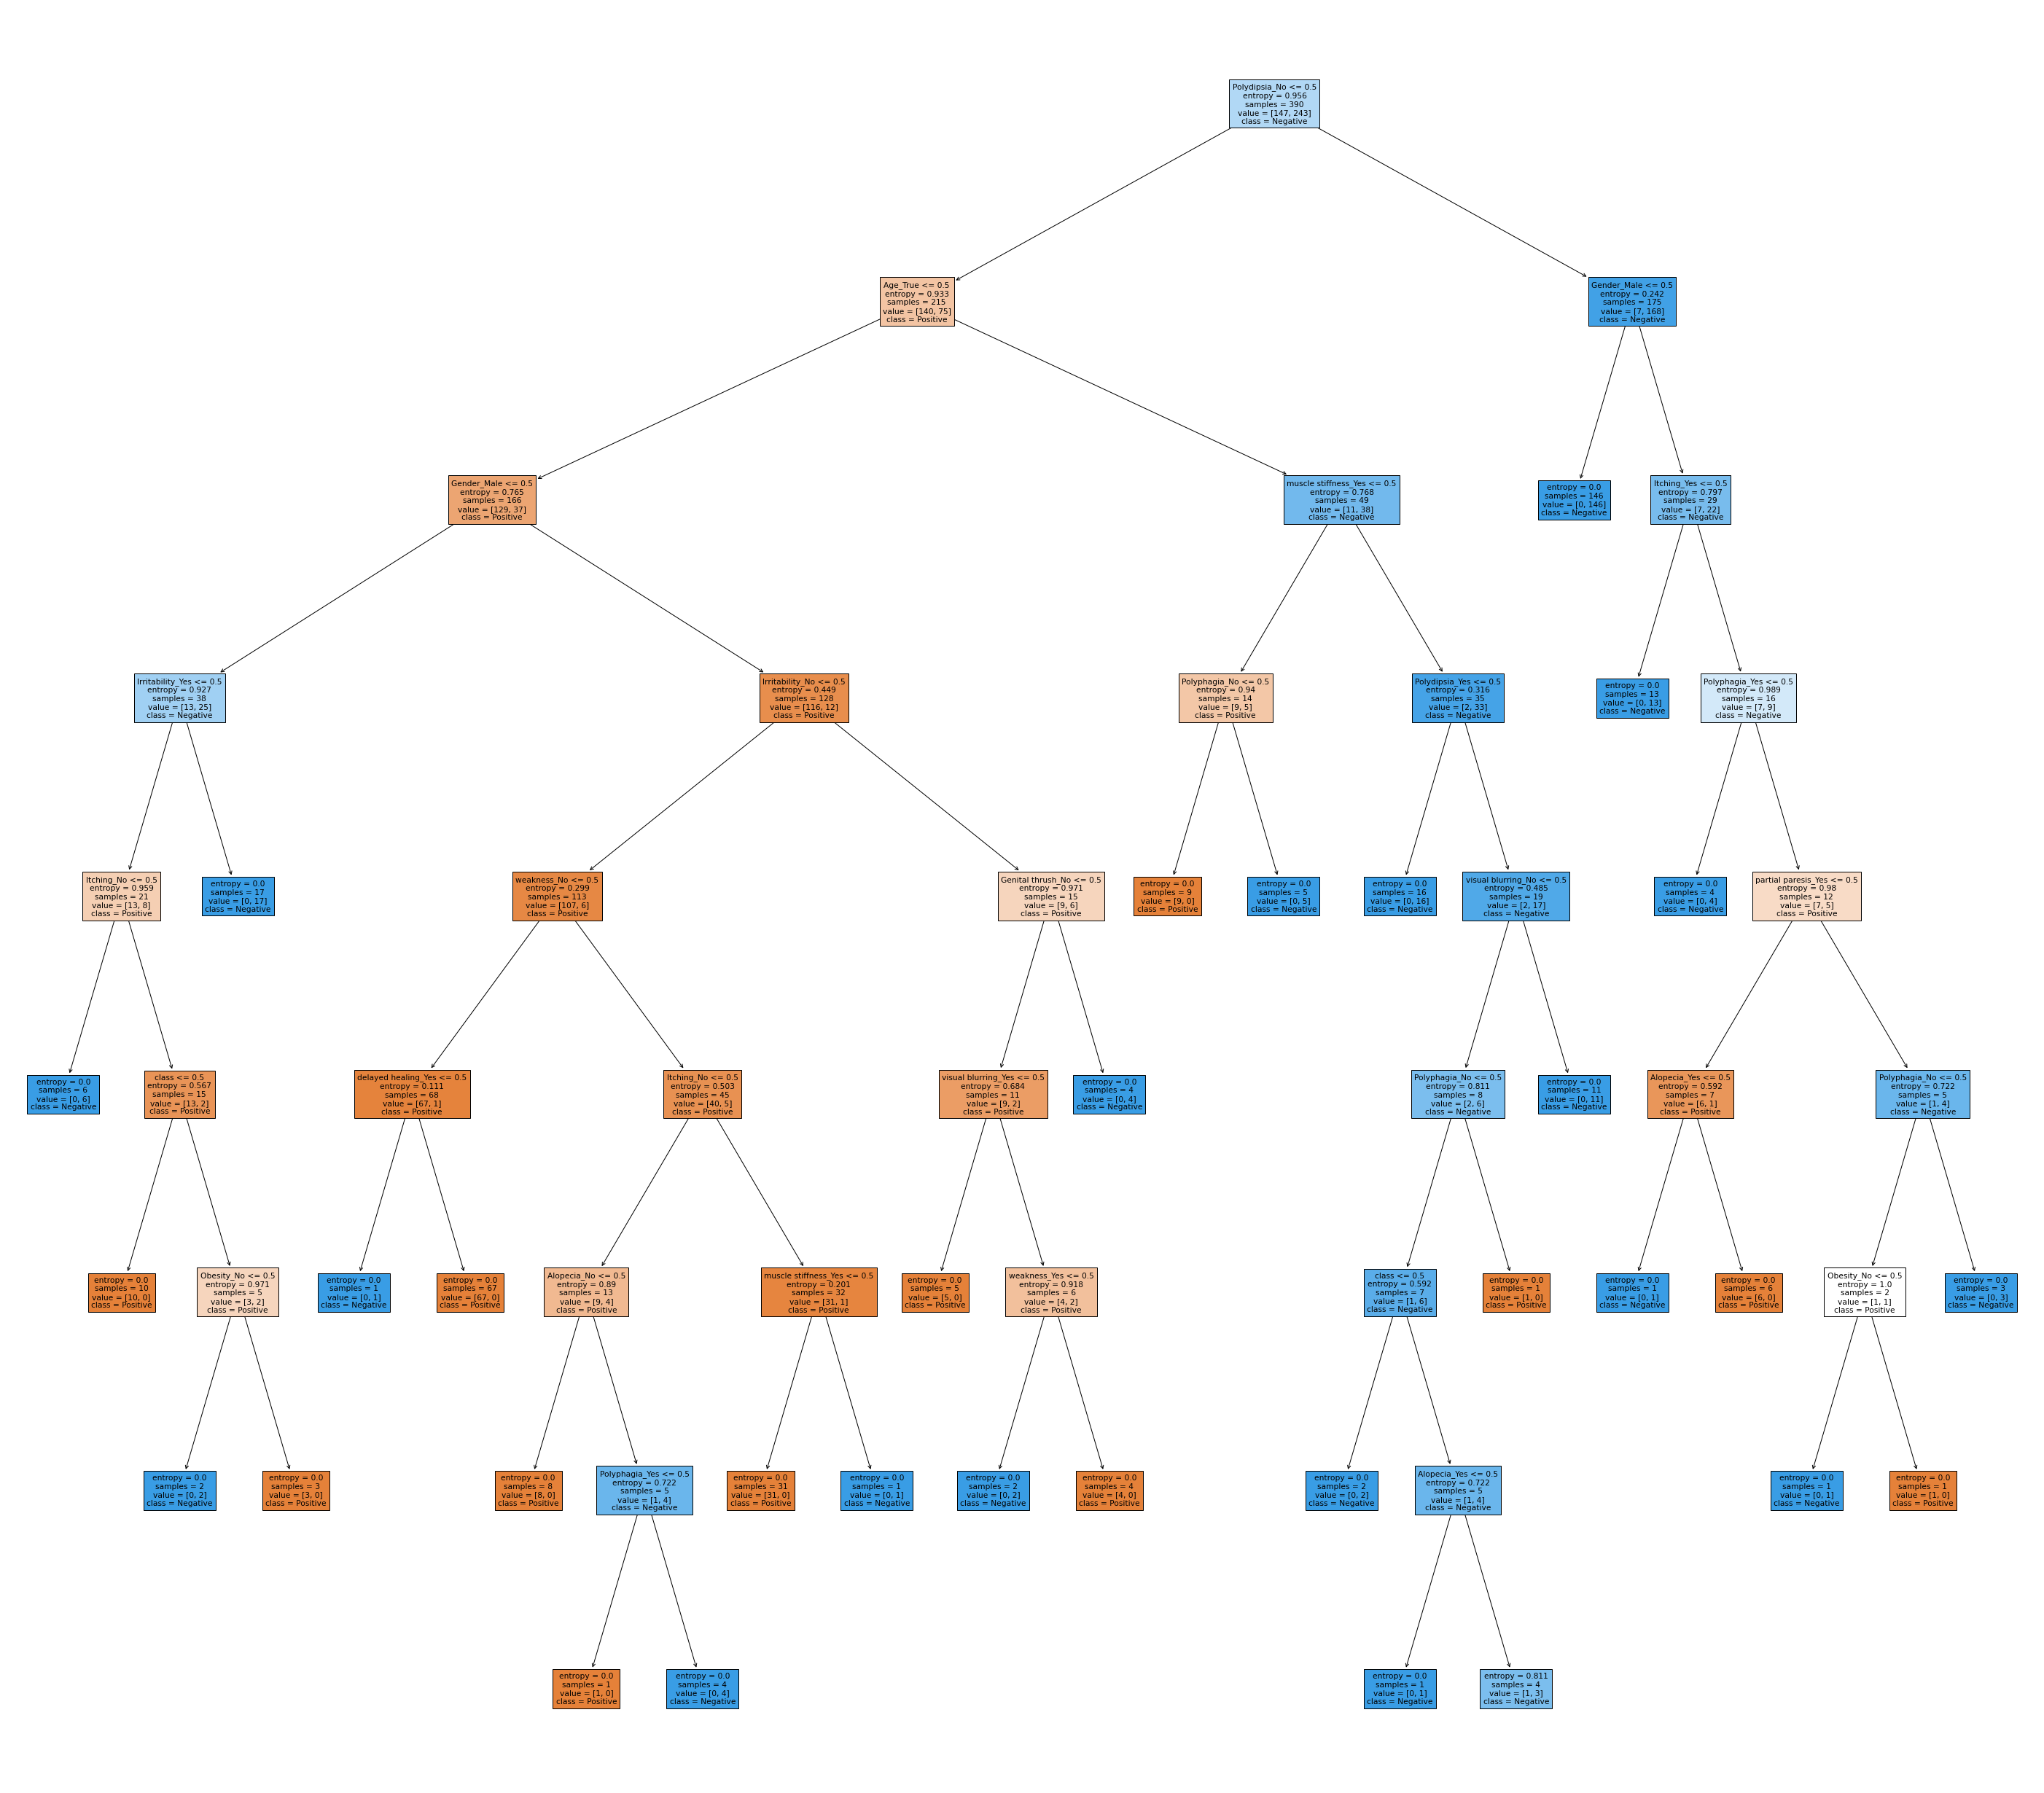

In [15]:
fig = plt.figure(figsize=(50,45))
x = tree.plot_tree(dtree, feature_names=df_gd.columns, class_names=["Positive", "Negative"], filled=True)
fig.savefig("dt.png")

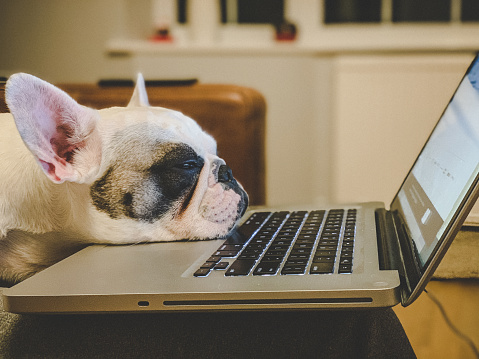

I could not implement a decision tree as homemade but I want to share my sklearn work on this practice. I had a lot of trouble trying to do a homemade decision tree algorithm so I decided to share it as made using the sklearn library.